# LOAD DEFAULT PREDICTOR

### importing necessary libraries

In [394]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### loading csv file as a pandas dataframe

In [395]:
df = pd.read_csv('LDP.csv')

### check for successfully loading the dataset

In [396]:
df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,DSXA23S0GO,21.0,19635,201606,499.0,77,1.0,18.99,36.0,0.71,High School,Unemployed,NaN,No,No,Business,No,1.0
1,ZMWBAA2T1Y,69.0,66347,241415,686.0,83,3.0,14.83,48.0,0.12,High School,Unemployed,NaN,No,No,Other,Yes,0.0
2,0G8A47GUW0,44.0,49874,154974,756.0,89,2.0,9.28,60.0,0.85,Master's,Part-time,NaN,Yes,Yes,Education,No,1.0
3,ETI9K2MF9E,44.0,135962,46974,510.0,30,3.0,6.07,60.0,0.59,Master's,Self-employed,NaN,Yes,No,Other,Yes,0.0
4,D8ZVL3OMX8,25.0,73734,178341,373.0,51,2.0,5.74,48.0,0.15,High School,Self-employed,NaN,No,No,Education,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75353,5PRL08B5CS,25.0,32015,206771,799.0,106,2.0,8.90,36.0,0.41,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0.0
75354,A59MTVVARI,43.0,99946,160772,827.0,52,2.0,21.67,24.0,0.72,Bachelor's,Part-time,Single,No,No,Auto,Yes,0.0
75355,BX6AR4SLCF,36.0,32649,188890,751.0,39,1.0,14.87,48.0,0.85,Bachelor's,Unemployed,Single,No,No,Business,No,0.0
75356,RADXHCG0A2,23.0,16620,61761,605.0,6,2.0,8.46,24.0,0.19,High School,Part-time,Divorced,No,Yes,Business,Yes,1.0


### validating the features present in the dataset

In [397]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75358 entries, 0 to 75357
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LoanID          75358 non-null  object 
 1   Age             75300 non-null  float64
 2   Income          75358 non-null  int64  
 3   LoanAmount      75358 non-null  int64  
 4   CreditScore     75242 non-null  float64
 5   MonthsEmployed  75358 non-null  int64  
 6   NumCreditLines  75246 non-null  float64
 7   InterestRate    75358 non-null  float64
 8   LoanTerm        75216 non-null  float64
 9   DTIRatio        75325 non-null  float64
 10  Education       75358 non-null  object 
 11  EmploymentType  75191 non-null  object 
 12  MaritalStatus   75289 non-null  object 
 13  HasMortgage     75358 non-null  object 
 14  HasDependents   75235 non-null  object 
 15  LoanPurpose     75275 non-null  object 
 16  HasCoSigner     75358 non-null  object 
 17  Default         75297 non-null 

# EXPLORATORY DATA ANALYSIS 

### Anomaly Detection Problem Observed : NEED TO LOOK FOR MORE PRECISION AS COMPARED TO ACCURACY

<Axes: xlabel='Default'>

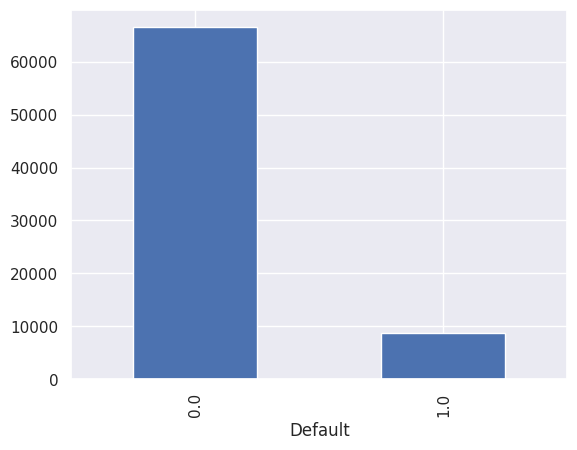

In [398]:
df['Default'].value_counts().plot.bar()

### checking the size and structure of the data frame 

In [302]:
df.shape

(75358, 18)

### checking for missing data entries in the dataset

In [303]:
df.isna().sum()

LoanID              0
Age                58
Income              0
LoanAmount          0
CreditScore       116
MonthsEmployed      0
NumCreditLines    112
InterestRate        0
LoanTerm          142
DTIRatio           33
Education           0
EmploymentType    167
MaritalStatus      69
HasMortgage         0
HasDependents     123
LoanPurpose        83
HasCoSigner         0
Default            61
dtype: int64

### count of total missing values 

In [304]:
df.isna().sum().sum()

964

### statistical information of the dataset

In [305]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,75300.000000,75358.000000,75358.000000,75242.000000,75358.000000,75246.000000,75358.000000,75216.000000,75325.000000,75297.000000
mean,43.564276,82612.746769,127414.377213,575.180498,59.589188,2.503309,13.513458,36.058073,0.500005,0.116353
std,14.997306,38933.337512,70791.457208,159.146560,34.688852,1.117109,6.659233,16.981967,0.230833,0.320649
min,18.000000,15000.000000,5005.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,49153.250000,65998.500000,438.000000,30.000000,2.000000,7.740000,24.000000,0.300000,0.000000
50%,44.000000,82534.500000,127292.000000,575.000000,59.000000,3.000000,13.490000,36.000000,0.500000,0.000000
75%,57.000000,116331.750000,189044.500000,714.000000,90.000000,4.000000,19.280000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249998.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


### validation of distribution of numerical features in the dataset

<function matplotlib.pyplot.show(close=None, block=None)>

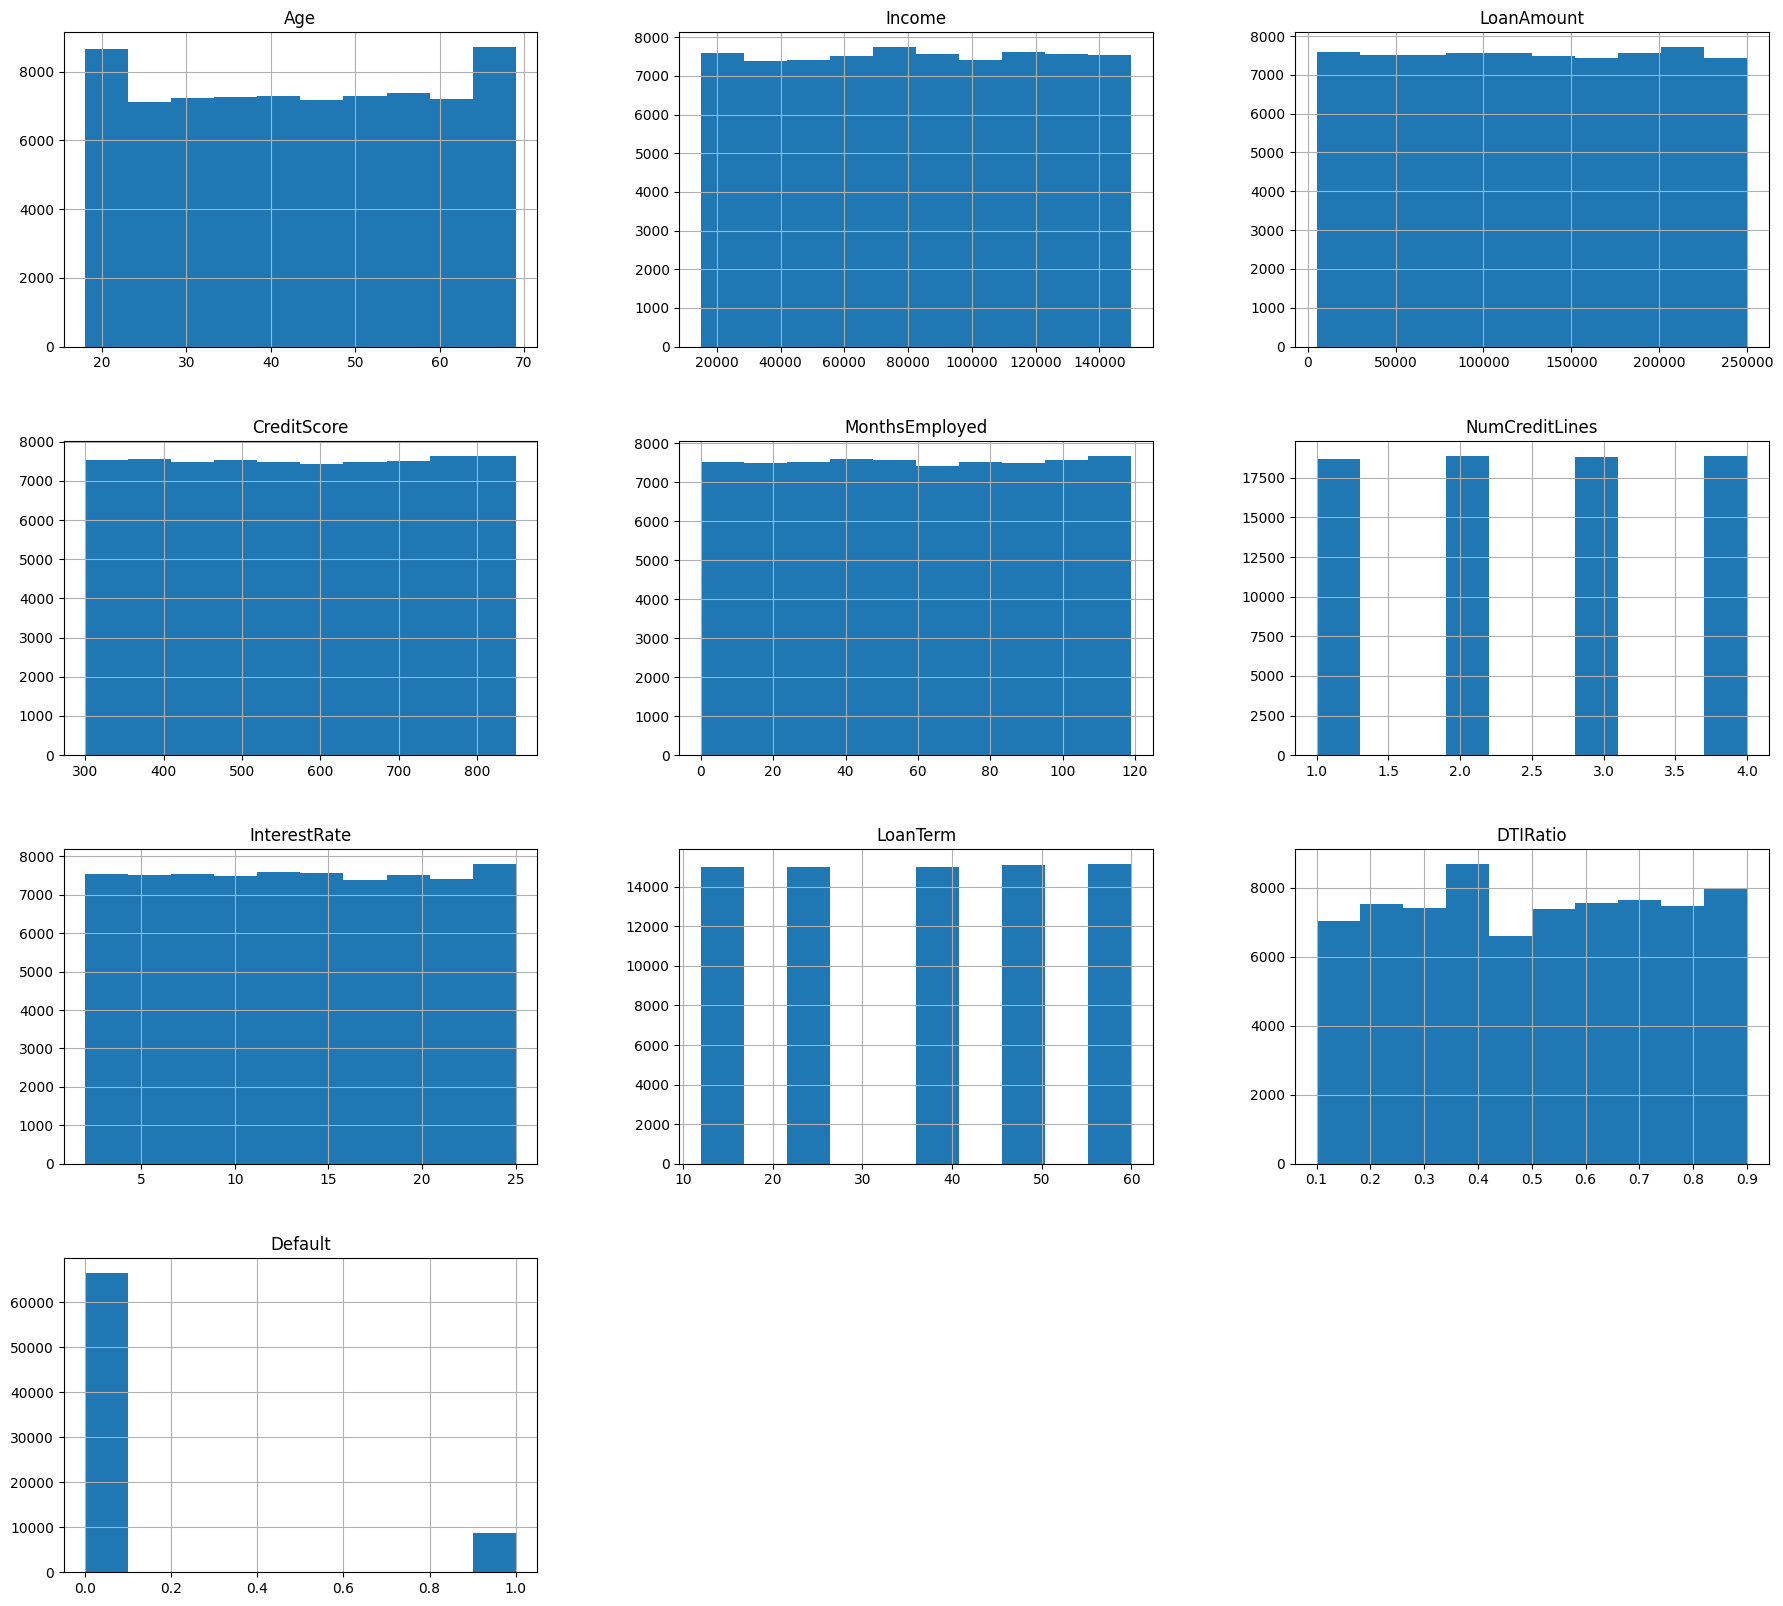

In [306]:
df.hist(figsize = (22,20))
plt.show

In [307]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

# DATA PREPROCESSING

### removing irrelevent columns from the dataset 

In [308]:
new = df[['Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default']]
new.to_csv("LDP_1.csv",index=False)

In [309]:
new.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education',
       'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents',
       'LoanPurpose', 'HasCoSigner', 'Default'],
      dtype='object')

In [310]:
df = pd.read_csv('LDP_1.csv');
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,21.0,19635,201606,499.0,77,1.0,18.99,36.0,0.71,High School,Unemployed,NaN,No,No,Business,No,1.0
1,69.0,66347,241415,686.0,83,3.0,14.83,48.0,0.12,High School,Unemployed,NaN,No,No,Other,Yes,0.0
2,44.0,49874,154974,756.0,89,2.0,9.28,60.0,0.85,Master's,Part-time,NaN,Yes,Yes,Education,No,1.0
3,44.0,135962,46974,510.0,30,3.0,6.07,60.0,0.59,Master's,Self-employed,NaN,Yes,No,Other,Yes,0.0
4,25.0,73734,178341,373.0,51,2.0,5.74,48.0,0.15,High School,Self-employed,NaN,No,No,Education,Yes,0.0


In [311]:
df.isna().sum()

Age                58
Income              0
LoanAmount          0
CreditScore       116
MonthsEmployed      0
NumCreditLines    112
InterestRate        0
LoanTerm          142
DTIRatio           33
Education           0
EmploymentType    167
MaritalStatus      69
HasMortgage         0
HasDependents     123
LoanPurpose        83
HasCoSigner         0
Default            61
dtype: int64

### Imputation on dataset performed 

In [312]:
df['Age']= df['Age'].fillna(df['Age'].mean())

In [313]:
m = df['Age'].mean()
m

43.56427622841965

In [314]:
df['MaritalStatus'].mode()[0]

'Divorced'

In [315]:
df['CreditScore']= df['CreditScore'].fillna(df['CreditScore'].mean())

In [316]:
df['NumCreditLines']= df['NumCreditLines'].fillna(df['NumCreditLines'].mean())

In [317]:
df['LoanTerm']= df['LoanTerm'].fillna(df['LoanTerm'].mean())

In [318]:
df['DTIRatio']= df['DTIRatio'].fillna(df['DTIRatio'].mean())

In [319]:
df['EmploymentType']= df['EmploymentType'].fillna(df['EmploymentType'].mode()[0])

In [320]:
df['MaritalStatus']= df['MaritalStatus'].fillna(df['MaritalStatus'].mode()[0])

In [321]:
df['HasDependents']= df['HasDependents'].fillna(df['HasDependents'].mode()[0])

In [322]:
df['LoanPurpose']= df['LoanPurpose'].fillna(df['LoanPurpose'].mode()[0])

### ONE HOT ENCODER FOR ORDINAL DATA TYPE

In [323]:
from sklearn.preprocessing import OneHotEncoder
hotcoder = OneHotEncoder(sparse_output=False)
coded_df = hotcoder.fit_transform(df[['Education','LoanPurpose','MaritalStatus']])
coded_df = pd.DataFrame(coded_df,columns = ["Education_Bachelor's", 'Education_High School',
       "Education_Master's", 'Education_PhD', 'LoanPurpose_Auto',
       'LoanPurpose_Business', 'LoanPurpose_Education',
       'LoanPurpose_Home', 'LoanPurpose_Other', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single'])
coded_df

,Education_Bachelor's,Education_High School,Education_Master's,Education_PhD,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
75353,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
75354,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
75355,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
75356,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [324]:
hotcoder.get_feature_names_out()

array(["Education_Bachelor's", 'Education_High School',
       "Education_Master's", 'Education_PhD', 'LoanPurpose_Auto',
       'LoanPurpose_Business', 'LoanPurpose_Education',
       'LoanPurpose_Home', 'LoanPurpose_Other', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single'], dtype=object)

### Dropping rows where output variable had NaN Values (Domain specific Action Taken)

In [325]:
df = df.dropna()

### rechecking for any left over missing data 

In [326]:
df.isna().sum()

Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [327]:
df.shape

(75297, 17)

In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75297 entries, 0 to 75357
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             75297 non-null  float64
 1   Income          75297 non-null  int64  
 2   LoanAmount      75297 non-null  int64  
 3   CreditScore     75297 non-null  float64
 4   MonthsEmployed  75297 non-null  int64  
 5   NumCreditLines  75297 non-null  float64
 6   InterestRate    75297 non-null  float64
 7   LoanTerm        75297 non-null  float64
 8   DTIRatio        75297 non-null  float64
 9   Education       75297 non-null  object 
 10  EmploymentType  75297 non-null  object 
 11  MaritalStatus   75297 non-null  object 
 12  HasMortgage     75297 non-null  object 
 13  HasDependents   75297 non-null  object 
 14  LoanPurpose     75297 non-null  object 
 15  HasCoSigner     75297 non-null  object 
 16  Default         75297 non-null  float64
dtypes: float64(7), int64(3), object(7)
m

### LABEL ENCODER FOR NOMINAL DATA TYPE

In [329]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['EmploymentType']=encoder.fit_transform(df['EmploymentType'])
df['HasMortgage']=encoder.fit_transform(df['HasMortgage'])
df['HasDependents']=encoder.fit_transform(df['HasDependents'])
df['HasCoSigner']=encoder.fit_transform(df['HasCoSigner'])

In [332]:
df = df.drop(['LoanPurpose','MaritalStatus','Education'],axis=1)

In [360]:
coded_df = coded_df.dropna()
coded_df.corr()

,Education_Bachelor's,Education_High School,Education_Master's,Education_PhD,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
Education_Bachelor's,1.000000,-0.335412,-0.333209,-0.334263,-0.006661,-0.002354,0.004977,0.003605,0.000381,-0.008527,0.004458,0.004112
Education_High School,-0.335412,1.000000,-0.332399,-0.333450,0.005232,0.000613,-0.002848,-0.004462,0.001515,0.006307,0.001798,-0.008152
Education_Master's,-0.333209,-0.332399,1.000000,-0.331260,0.002132,0.002250,-0.001772,0.000086,-0.002687,-0.004269,-0.000741,0.005041
Education_PhD,-0.334263,-0.333450,-0.331260,1.000000,-0.000689,-0.000500,-0.000370,0.000768,0.000782,0.006497,-0.005532,-0.000991
LoanPurpose_Auto,-0.006661,0.005232,0.002132,-0.000689,1.000000,-0.248042,-0.247313,-0.249786,-0.247683,-0.001696,-0.000293,0.002000
LoanPurpose_Business,-0.002354,0.000613,0.002250,-0.000500,-0.248042,1.000000,-0.250122,-0.252623,-0.250496,0.005915,-0.002348,-0.003599
LoanPurpose_Education,0.004977,-0.002848,-0.001772,-0.000370,-0.247313,-0.250122,1.000000,-0.251880,-0.249759,-0.004184,0.005654,-0.001460
LoanPurpose_Home,0.003605,-0.004462,0.000086,0.000768,-0.249786,-0.252623,-0.251880,1.000000,-0.252257,-0.002374,-0.002381,0.004778
LoanPurpose_Other,0.000381,0.001515,-0.002687,0.000782,-0.247683,-0.250496,-0.249759,-0.252257,1.000000,0.002331,-0.000615,-0.001730
MaritalStatus_Divorced,-0.008527,0.006307,-0.004269,0.006497,-0.001696,0.005915,-0.004184,-0.002374,0.002331,1.000000,-0.504743,-0.500287


In [361]:
new_df = pd.concat([df,coded_df],axis=1)

In [362]:
new_df.corr()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,EmploymentType,...,Education_Master's,Education_PhD,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
Age,1.000000,-0.003387,-0.005258,-0.003338,-0.001444,-0.003754,0.002164,0.001776,-0.006336,0.003663,...,-0.002585,0.000379,0.002062,0.002033,-0.005225,0.002175,-0.001050,0.001134,0.003021,-0.004172
Income,-0.003387,1.000000,-0.003926,-0.008576,-0.003448,-0.006731,-0.004369,0.003040,-0.004324,-0.004360,...,0.005233,-0.001641,0.000668,0.000752,-0.001351,0.002164,-0.002242,-0.002880,0.003455,-0.000566
LoanAmount,-0.005258,-0.003926,1.000000,0.007086,0.003569,0.004122,-0.001744,0.006073,-0.008972,0.002275,...,-0.001763,0.000696,0.004266,-0.006049,0.001966,0.001763,-0.001923,0.000646,-0.002334,0.001691
CreditScore,-0.003338,-0.008576,0.007086,1.000000,-0.000180,0.004503,-0.000278,-0.006008,0.001127,-0.000658,...,0.000354,0.002269,-0.001737,-0.001278,-0.003727,0.003324,0.003389,-0.000299,0.007964,-0.007687
MonthsEmployed,-0.001444,-0.003448,0.003569,-0.000180,1.000000,-0.000768,-0.001596,-0.003797,-0.001321,0.001481,...,0.003374,-0.003005,-0.005603,0.002697,0.005258,-0.003765,0.001400,-0.003149,0.001317,0.001849
NumCreditLines,-0.003754,-0.006731,0.004122,0.004503,-0.000768,1.000000,-0.008647,0.002215,-0.004852,0.003134,...,-0.000583,-0.000343,-0.003042,-0.002946,0.008738,-0.002523,-0.000223,0.002133,-0.001475,-0.000667
InterestRate,0.002164,-0.004369,-0.001744,-0.000278,-0.001596,-0.008647,1.000000,-0.001024,-0.003767,0.001534,...,0.000445,0.001670,0.002773,-0.001690,0.001323,-0.005284,0.002925,0.003013,-0.002856,-0.000168
LoanTerm,0.001776,0.003040,0.006073,-0.006008,-0.003797,0.002215,-0.001024,1.000000,0.006538,0.002774,...,-0.001960,-0.001445,0.001477,-0.003796,0.001117,-0.002188,0.003414,-0.003449,0.004328,-0.000869
DTIRatio,-0.006336,-0.004324,-0.008972,0.001127,-0.001321,-0.004852,-0.003767,0.006538,1.000000,-0.002825,...,0.003408,0.003496,0.003898,-0.002711,0.003972,0.000695,-0.005830,-0.003856,-0.003833,0.007725
EmploymentType,0.003663,-0.004360,0.002275,-0.000658,0.001481,0.003134,0.001534,0.002774,-0.002825,1.000000,...,-0.007627,0.006519,-0.002975,-0.000641,0.002872,-0.001153,0.001888,-0.010486,0.006515,0.004020


## FEATURE EXTRACTTON 

In [366]:
new_df.corr()['Default']

Age                      -0.170467
Income                   -0.097668
LoanAmount                0.085028
CreditScore              -0.032328
MonthsEmployed           -0.093981
NumCreditLines            0.032206
InterestRate              0.131223
LoanTerm                  0.001340
DTIRatio                  0.018455
EmploymentType            0.034898
HasMortgage              -0.018703
HasDependents            -0.035906
HasCoSigner              -0.045226
Default                   1.000000
Education_Bachelor's      0.004946
Education_High School     0.020593
Education_Master's       -0.010884
Education_PhD            -0.014721
LoanPurpose_Auto          0.007979
LoanPurpose_Business      0.010613
LoanPurpose_Education     0.001736
LoanPurpose_Home         -0.027187
LoanPurpose_Other         0.007038
MaritalStatus_Divorced    0.018399
MaritalStatus_Married    -0.031500
MaritalStatus_Single      0.013073
Name: Default, dtype: float64

### important features observed :
### Age, InterestRate, Income, LoanAmount, 
### MonthsEmployed, EmploymentType, HasDependents,
### HasCoSigner

In [368]:
df.to_csv('LDP_1.csv',index=False)
df1 = pd.read_csv('LDP_1.csv')
df1

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,EmploymentType,HasMortgage,HasDependents,HasCoSigner,Default
0,21.0,19635,201606,499.0,77,1.0,18.99,36.0,0.71,3,0,0,0,1.0
1,69.0,66347,241415,686.0,83,3.0,14.83,48.0,0.12,3,0,0,1,0.0
2,44.0,49874,154974,756.0,89,2.0,9.28,60.0,0.85,1,1,1,0,1.0
3,44.0,135962,46974,510.0,30,3.0,6.07,60.0,0.59,2,1,0,1,0.0
4,25.0,73734,178341,373.0,51,2.0,5.74,48.0,0.15,2,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75292,25.0,32015,206771,799.0,106,2.0,8.90,36.0,0.41,3,0,1,0,0.0
75293,43.0,99946,160772,827.0,52,2.0,21.67,24.0,0.72,1,0,0,1,0.0
75294,36.0,32649,188890,751.0,39,1.0,14.87,48.0,0.85,3,0,0,0,0.0
75295,23.0,16620,61761,605.0,6,2.0,8.46,24.0,0.19,1,0,1,1,1.0


In [369]:
df.corr()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,EmploymentType,HasMortgage,HasDependents,HasCoSigner,Default
Age,1.000000,-0.003387,-0.005258,-0.003338,-0.001444,-0.003754,0.002164,0.001776,-0.006336,0.003663,-0.002300,-0.002260,0.000241,-0.170467
Income,-0.003387,1.000000,-0.003926,-0.008576,-0.003448,-0.006731,-0.004369,0.003040,-0.004324,-0.004360,-0.004944,-0.004610,-0.003941,-0.097668
LoanAmount,-0.005258,-0.003926,1.000000,0.007086,0.003569,0.004122,-0.001744,0.006073,-0.008972,0.002275,-0.000528,-0.001015,-0.000043,0.085028
CreditScore,-0.003338,-0.008576,0.007086,1.000000,-0.000180,0.004503,-0.000278,-0.006008,0.001127,-0.000658,0.002275,-0.003735,-0.004462,-0.032328
MonthsEmployed,-0.001444,-0.003448,0.003569,-0.000180,1.000000,-0.000768,-0.001596,-0.003797,-0.001321,0.001481,-0.003450,0.000764,-0.001935,-0.093981
NumCreditLines,-0.003754,-0.006731,0.004122,0.004503,-0.000768,1.000000,-0.008647,0.002215,-0.004852,0.003134,-0.002896,-0.003328,0.002148,0.032206
InterestRate,0.002164,-0.004369,-0.001744,-0.000278,-0.001596,-0.008647,1.000000,-0.001024,-0.003767,0.001534,0.000277,-0.000414,-0.006234,0.131223
LoanTerm,0.001776,0.003040,0.006073,-0.006008,-0.003797,0.002215,-0.001024,1.000000,0.006538,0.002774,0.000946,0.007810,-0.009980,0.001340
DTIRatio,-0.006336,-0.004324,-0.008972,0.001127,-0.001321,-0.004852,-0.003767,0.006538,1.000000,-0.002825,-0.000743,-0.000672,0.003189,0.018455
EmploymentType,0.003663,-0.004360,0.002275,-0.000658,0.001481,0.003134,0.001534,0.002774,-0.002825,1.000000,-0.004730,-0.002548,-0.008326,0.034898


Text(0.5, 1.0, 'Age vs Applicants')

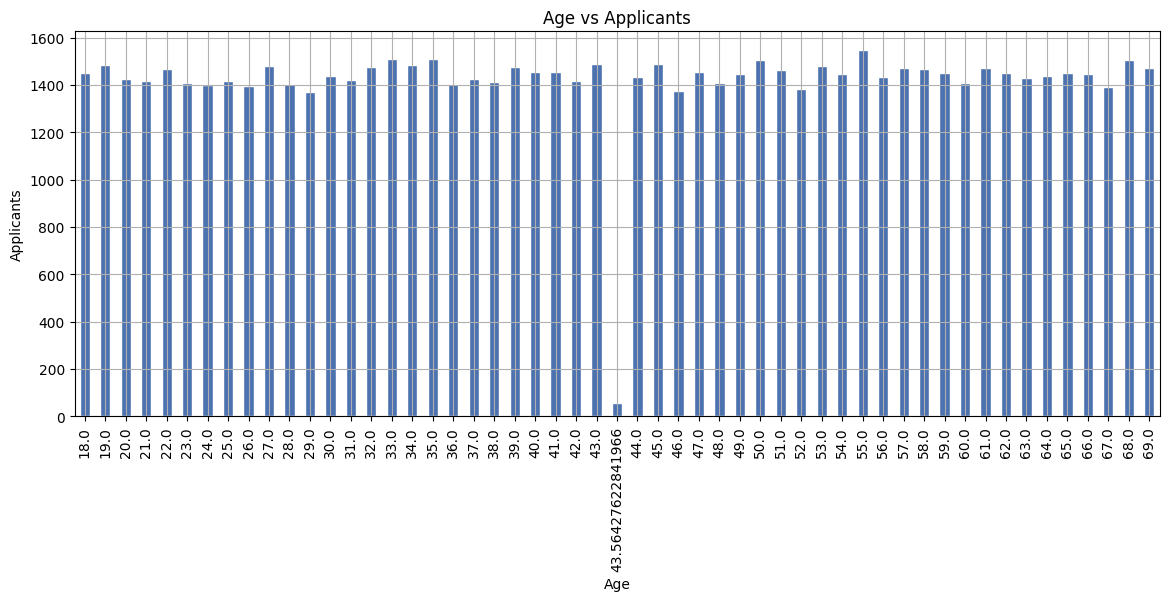

In [370]:
fig,ax=plt.subplots(figsize=(14,5))
sns.set()
df.Age.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Applicants')
plt.title('Age vs Applicants')

### BOX-PLOT VIZUALIZATION FOR OUTLIER DETECTION

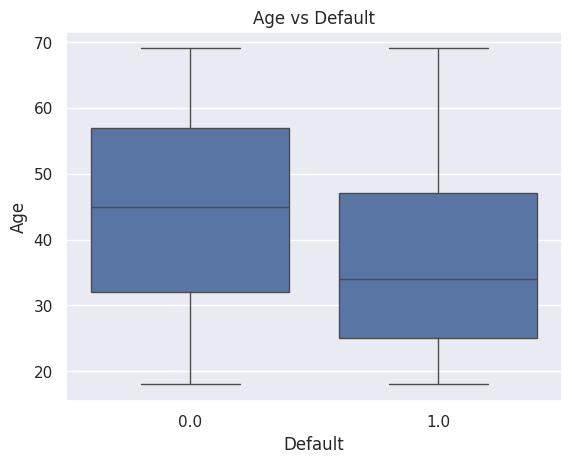

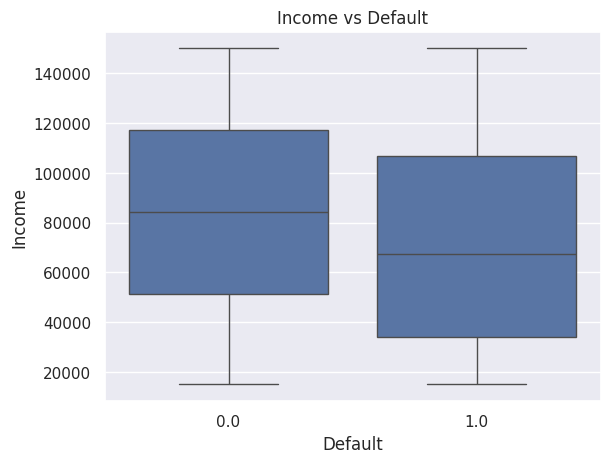

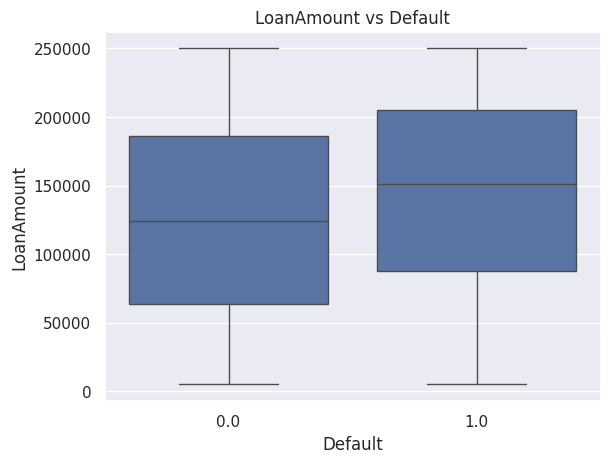

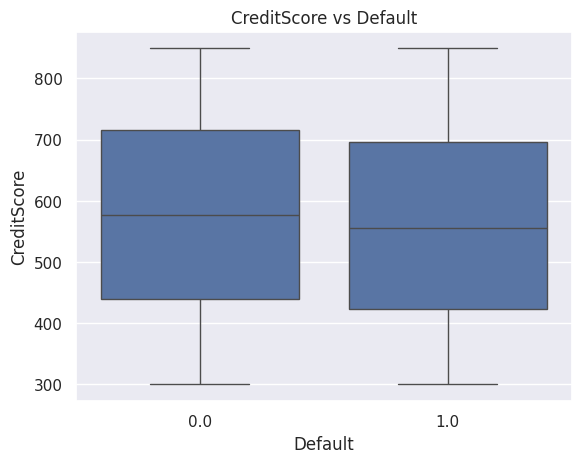

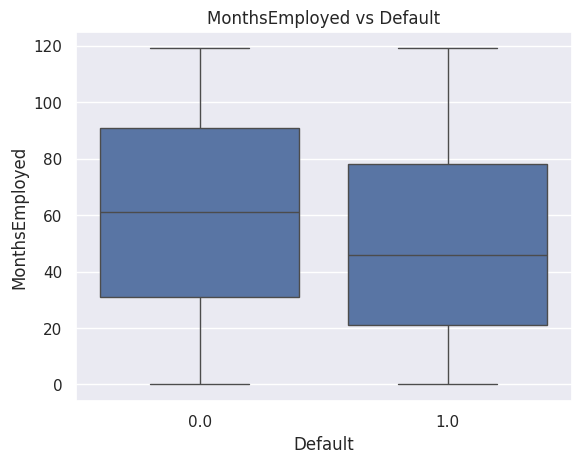

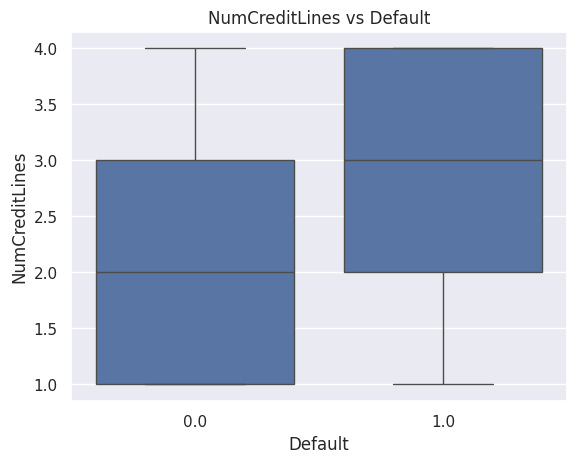

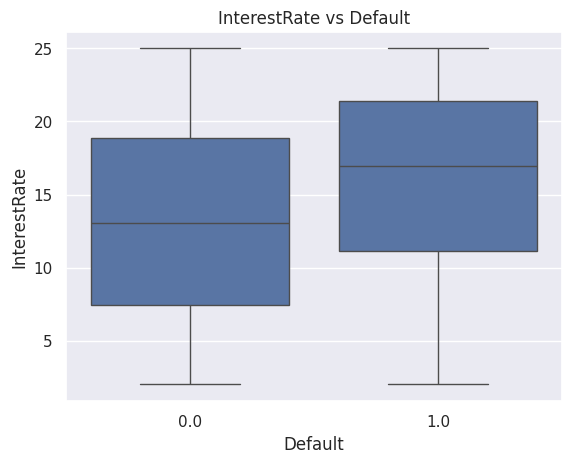

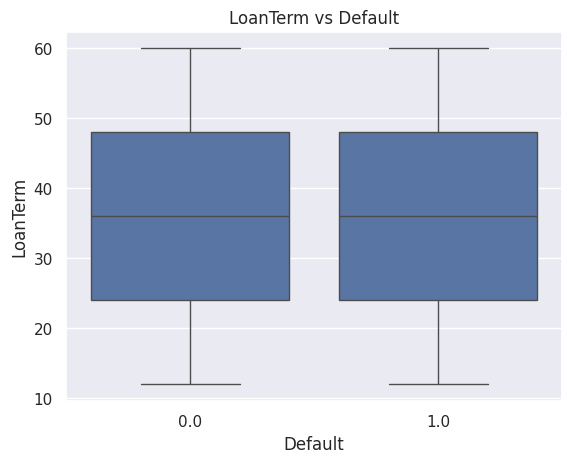

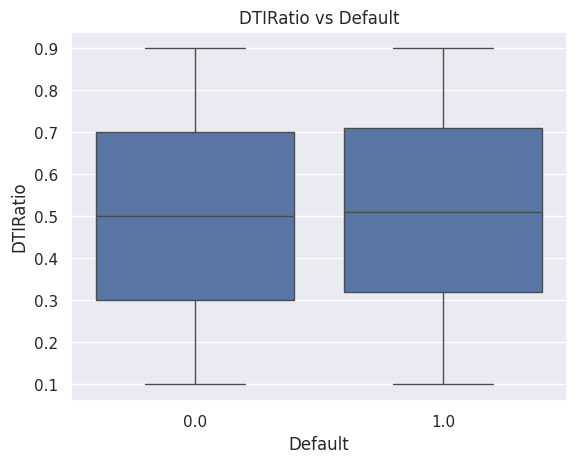

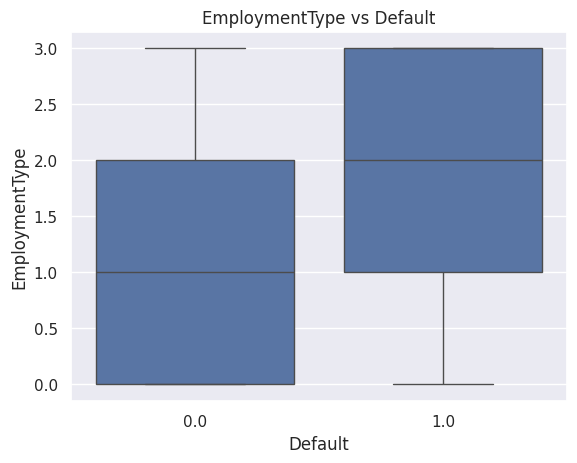

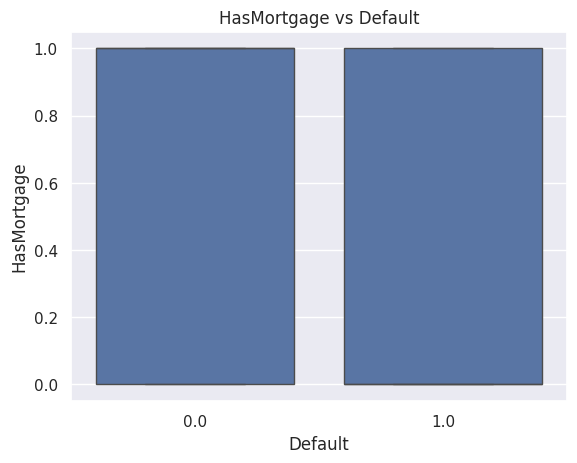

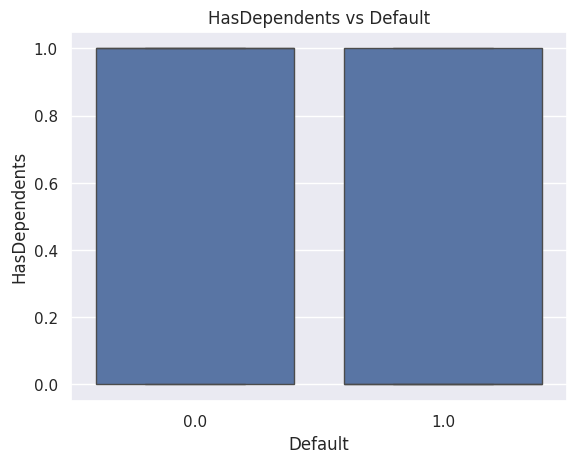

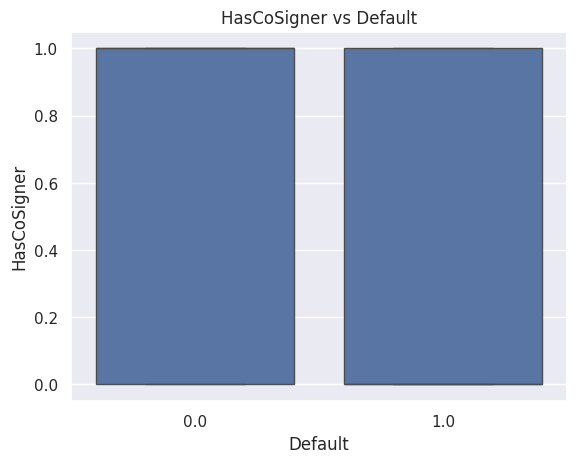

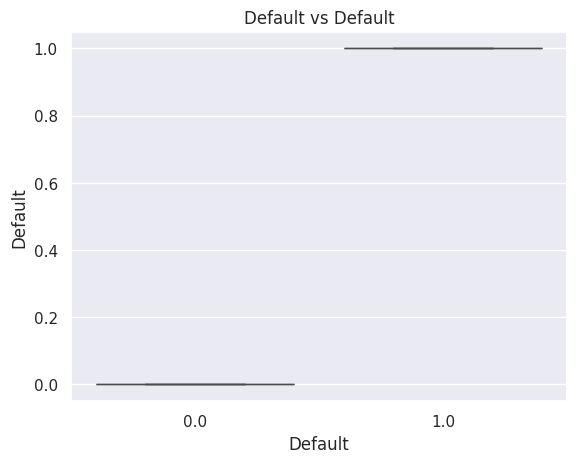

In [377]:
for col in df.columns:
    plt.figure()
    sns.boxplot(x ="Default",y=col ,data = df1)
    plt.title(f"{col} vs Default")
    plt.show()

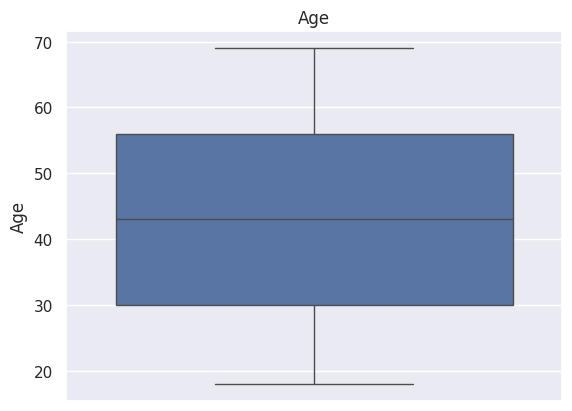

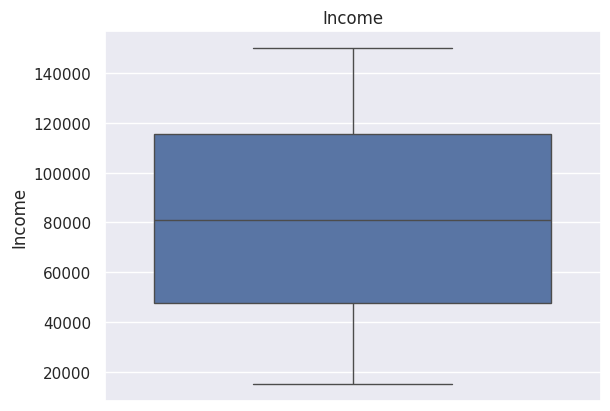

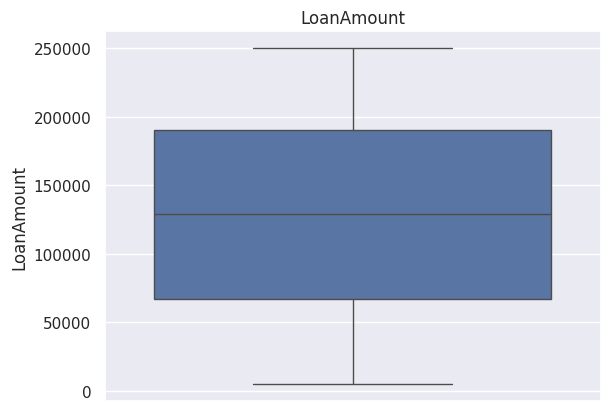

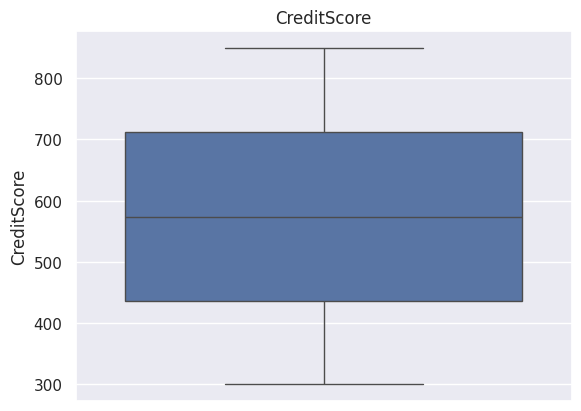

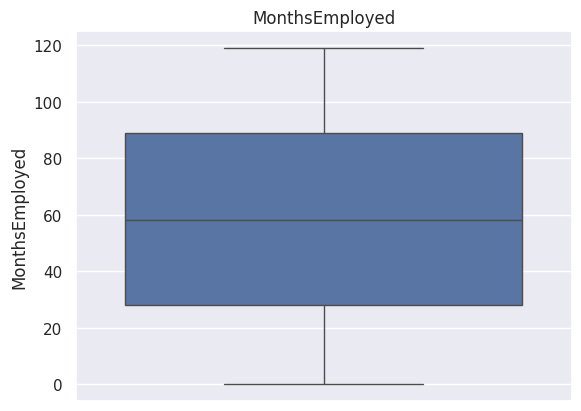

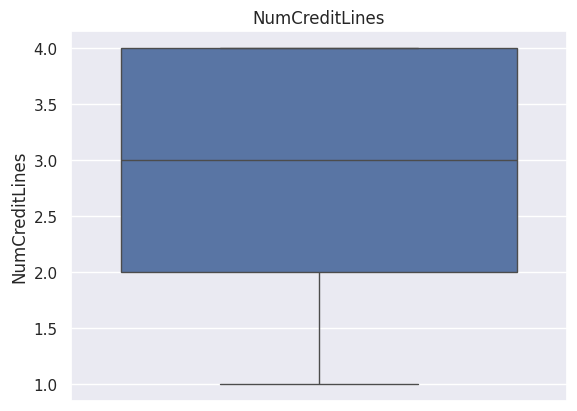

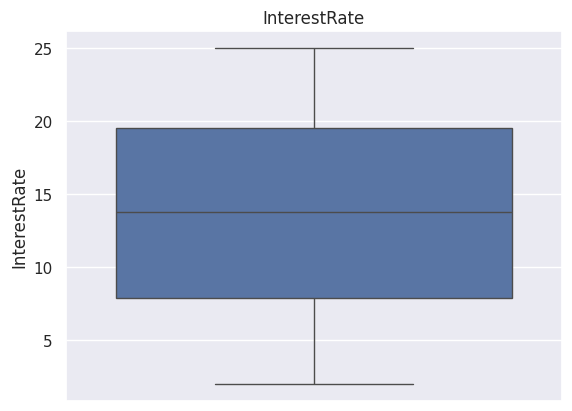

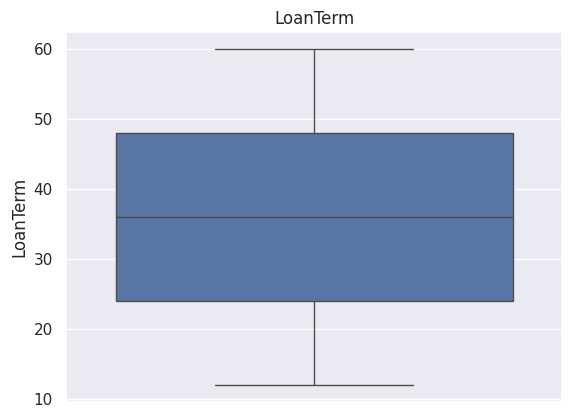

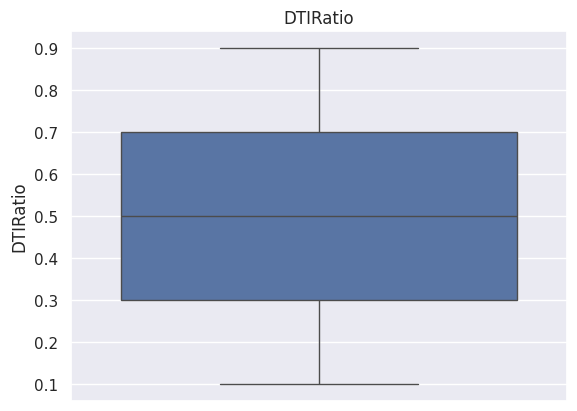

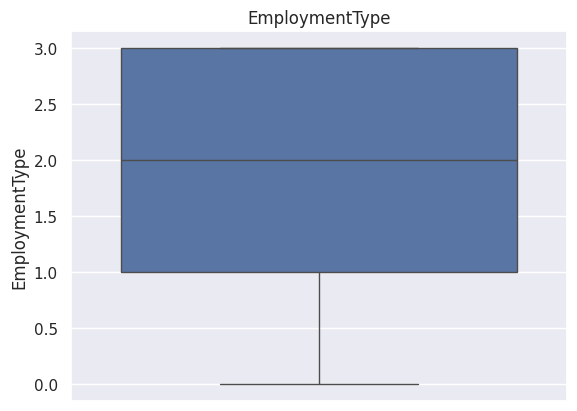

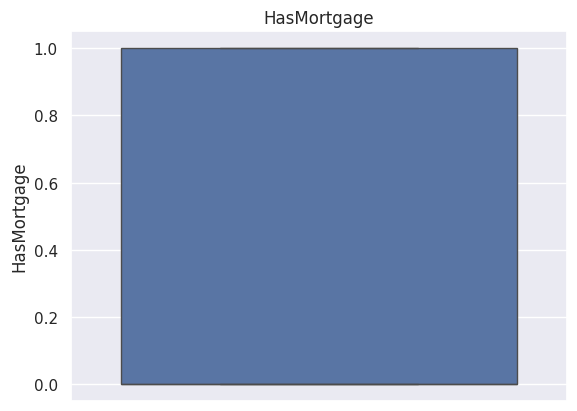

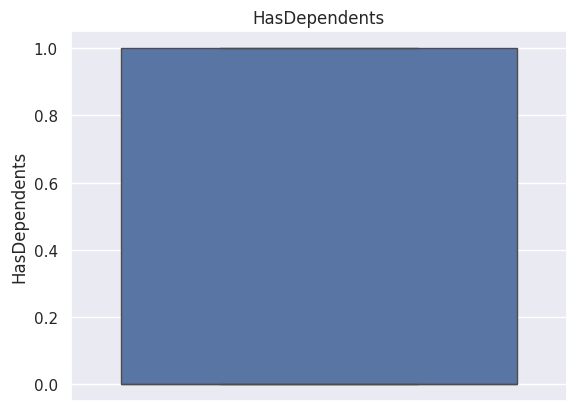

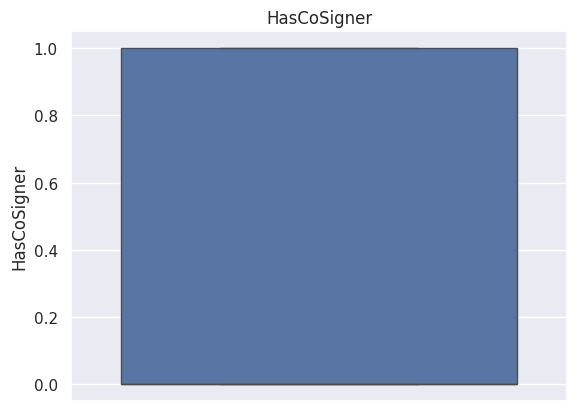

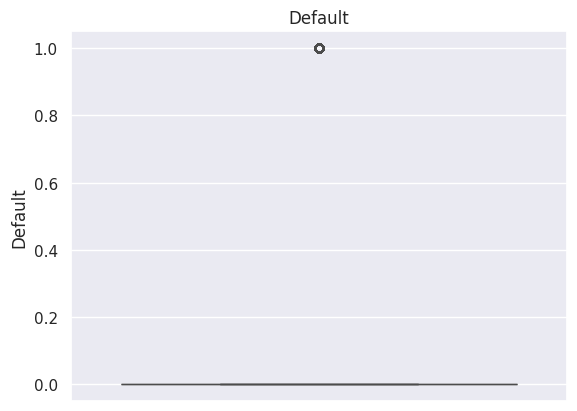

In [378]:
for col in df.columns:
    plt.figure()
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

### RESAMPLING OF THE DATA 

<Axes: xlabel='Default'>

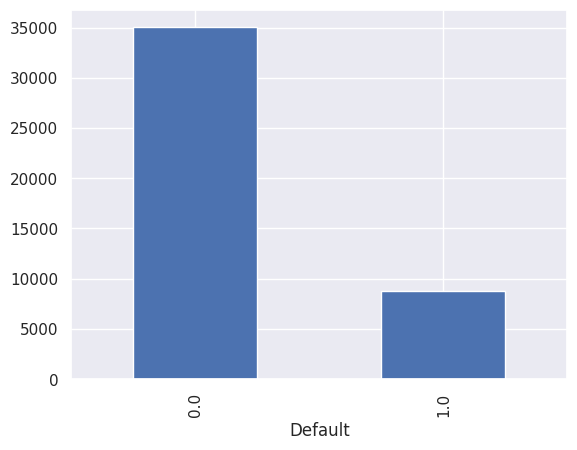

In [401]:
df['Default'].value_counts().plot.bar()

In [400]:
from sklearn.utils import resample

major_class = df[df['Default']==0]
minor_class = df[df['Default']==1]

resam = resample(major_class,replace=False,n_samples=len(minor_class)*4,random_state=12345)

df= pd.concat([resam,minor_class])
df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
37936,X2EDOUOQ6Y,63.0,51664,51520,576.0,9,2.0,4.91,12.0,0.39,Master's,Full-time,Divorced,No,No,Auto,No,0.0
39309,WQQH66M8YP,37.0,99187,115012,782.0,71,1.0,2.06,24.0,0.25,Master's,Unemployed,Divorced,No,No,Business,No,0.0
32910,IIGXPEAIVD,61.0,107372,120152,661.0,107,1.0,15.68,24.0,0.25,PhD,Part-time,Married,No,No,Education,No,0.0
25148,S8RHFGGWC4,67.0,38692,22260,476.0,17,2.0,3.78,48.0,0.80,PhD,Part-time,Divorced,Yes,Yes,Home,Yes,0.0
68129,SE1VSYQ04L,40.0,140657,73385,607.0,28,4.0,11.84,12.0,0.47,PhD,Unemployed,Married,No,Yes,Auto,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75320,O4JAJEKJTP,54.0,15094,235129,685.0,48,1.0,19.63,12.0,0.17,Master's,Full-time,Single,Yes,No,Auto,Yes,1.0
75329,0G2IG4ZSEK,19.0,140243,244389,339.0,3,1.0,4.05,60.0,0.58,High School,Full-time,Married,No,Yes,Auto,Yes,1.0
75335,3CQDO9L6FW,66.0,46671,179609,666.0,9,2.0,21.90,36.0,0.57,PhD,Part-time,Single,Yes,No,Business,No,1.0
75349,MHWIRF7SCJ,18.0,89257,128424,384.0,39,3.0,16.25,60.0,0.63,Bachelor's,Full-time,Married,No,Yes,Education,Yes,1.0


### SCALING DATASET 

In [380]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [381]:
from sklearn.model_selection import train_test_split
x = df.drop('Default', axis=1)
y = df['Default']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


### LOGISTIC REGRESSION CV MODEL

In [382]:
model = LogisticRegressionCV(random_state=42)
model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8028763839744322

Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.98      0.89      6973
         1.0       0.58      0.13      0.21      1788

    accuracy                           0.80      8761
   macro avg       0.70      0.55      0.55      8761
weighted avg       0.77      0.80      0.75      8761


Confusion Matrix:
[[6806  167]
 [1560  228]]


In [383]:
from sklearn.ensemble import RandomForestClassifier  
model = RandomForestClassifier(random_state=42)


In [31]:
model.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [32]:
y_pred = model.predict(x_test)


In [33]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))


Accuracy: 0.8104903078677309
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      7023
           1       0.59      0.16      0.25      1747

    accuracy                           0.81      8770
   macro avg       0.71      0.57      0.57      8770
weighted avg       0.78      0.81      0.76      8770

Confusion Matrix:
 [[6829  194]
 [1468  279]]
ROC-AUC Score: 0.5660394120846372


In [35]:
feature_importance = pd.Series(model.feature_importances_, index=x.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print("Feature Importance:\n", feature_importance)


Feature Importance:
 Income            0.162124
InterestRate      0.160880
LoanAmount        0.148892
Age               0.134634
CreditScore       0.129313
MonthsEmployed    0.126436
LoanTerm          0.048653
EmploymentType    0.039539
HasMortgage       0.019267
HasDependents     0.015421
HasCoSigner       0.014841
dtype: float64


<Axes: xlabel='Default'>

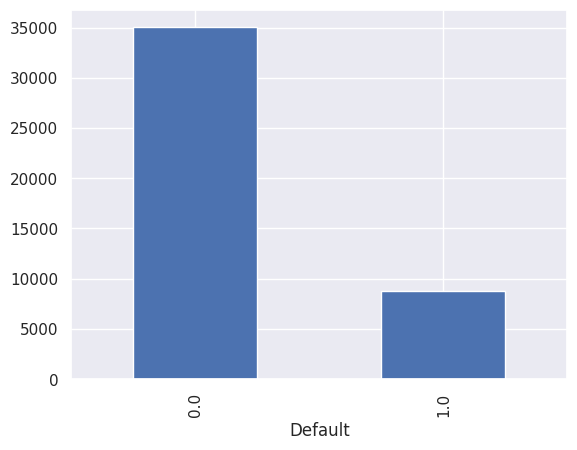

In [384]:
df['Default'].value_counts().plot.bar()

### The Anamoly Detection Problem Observed from above Vizual

### SVM MODEL

In [385]:
def build_svm_model():
    from sklearn.svm import SVC
    model = SVC(C=2, kernel='rbf')
    model.fit(x_train, y_train)
    save_model(model, 'svm.pkl')
    return model

### LOGISTIC REGRESSION MODEL

In [386]:
def build_lg_model():
    from sklearn.linear_model import LogisticRegressionCV
    model = LogisticRegressionCV()
    model.fit(x_train, y_train)
    save_model(model, 'lg.pkl')
    return model

### K-NEAREST NEIGHBOUR MODEL

In [387]:
def build_knn_model():
    from sklearn.neighbors import KNeighborsClassifier
    model = KNeighborsClassifier(n_neighbors=7)
    model.fit(x_train, y_train)
    save_model(model, 'knn.pkl')
    return model

### NAIVE BAYES MODEL

In [388]:
def build_nb_model():
    from sklearn.naive_bayes import GaussianNB
    model = GaussianNB()
    model.fit(x_train, y_train)
    save_model(model, 'nb.pkl')
    return model

### DECISION TREE MODEL 

In [389]:
def build_dt_model():
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier(max_depth=500)
    model.fit(x_train, y_train)
    save_model(model, 'dt.pkl')
    return model

### RANDOM FOREST MODEL

In [390]:
def build_rf_model():
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(n_estimators=500)
    model.fit(x_train, y_train)
    save_model(model, 'rf.pkl')
    return model

### CATBOOST MODEL

In [391]:
def build_catboost_model():
    from catboost import CatBoostClassifier
    model = CatBoostClassifier(verbose=False)
    model.fit(x_train, y_train)
    save_model(model, 'cb.pkl')
    return model

### XG-BOOST MODEL

In [392]:
def build_xgb_model():
    from xgboost import XGBClassifier
    model = XGBClassifier()
    model.fit(x_train, y_train)
    save_model(model, 'xgb.pkl')
    return model

### MODEL EVALUATION METRICES

In [393]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model):
    # define y_true and y_pred
    y_true = y_test
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

In [46]:
import pickle

def save_model(model, name):
    with open(name, 'wb') as file:
        pickle.dump(model, file)

## MODEL EVALUATION

In [47]:
model_metrics = []
model_functions = [
    {"name": "SVM", "function": build_svm_model},
    {"name": "LG", "function": build_lg_model},
    {"name": "KNN", "function": build_knn_model},
    {"name": "NB", "function": build_nb_model},
    {"name": "DT", "function": build_dt_model},
    {"name": "RF", "function": build_rf_model},
    {"name": "CatBoost", "function": build_catboost_model},
    {"name": "XGBoost", "function": build_xgb_model}
]

for model_info in model_functions:
    model = model_info['function']()
    accuracy, precision, recall, f1 = evaluate_model(model)
    model_metrics.append({
        "name": model_info['name'], 
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1
    })

for info in model_metrics:
    print(f"{info['name']:<10}| {info['accuracy']:^5} | {info['precision']:^5} | {info['recall']:^5} | {info['f1']:^5} ")

/home/ak/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ak/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ak/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS

SVM       | 0.8007981755986316 |  0.0  |  0.0  |  0.0  
LG        | 0.8083238312428734 | 0.5993975903614458 | 0.113909559244419 | 0.19143819143819144 
KNN       | 0.7867730900798175 | 0.36886993603411516 | 0.09902690326273612 | 0.15613718411552346 
NB        | 0.8093500570125428 | 0.649402390438247 | 0.0933028048082427 | 0.16316316316316315 
DT        | 0.7155074116305588 | 0.3012752391073326 | 0.32455638236977674 | 0.31248277762469 
RF        | 0.8102622576966932 | 0.587737843551797 | 0.159129937034917 | 0.25045045045045045 
CatBoost  | 0.8066134549600912 | 0.5451327433628319 | 0.17630223239839726 | 0.2664359861591695 
XGBoost   | 0.8013683010262258 | 0.5036284470246735 | 0.1986262163709216 | 0.2848932676518883 


### ----'name'----| ----'accuracy'---- | ----'precision'---- | ----'recall'---- | ----'f1'----

### Since the Anomaly Detection is evaluated by Precision Score and not Accuracy 
### [Random Forest Model is the best responding model]
### [Also the Accuracy of RF Model is the Highest]

#### MODEL|-------ACCURACY------- |-------PRECISION----------|------------RECALL------------|-------F1-SCORE-------- 
#### [[[ RF ]]]| 0.811060433295325 | 0.5969827586206896 | 0.15855752718946767 | 0.250565355042967 

In [48]:
df['EmploymentType'].value_counts()

EmploymentType
3    11138
2    11076
1    10978
0    10658
Name: count, dtype: int64

## Performing GridSearch for Achieving Best Optimised Model 

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Define the parameter grid to search through
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(x_train,y_train)

# Print the best parameters found
print("Best parameters found:")
print(grid_search.best_params_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters found:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}


In [53]:
rf = RandomForestClassifier(max_depth=10,min_samples_leaf=4,min_samples_split=5,n_estimators=100)
rf.fit(x_train, y_train)
y_true = y_test
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
accuracy, precision, recall, f1

(0.8082098061573546,
 0.6012461059190031,
 0.11047510017172295,
 0.18665377176015474)

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  27.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  14.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  14.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   6.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  13.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   6.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  26.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=  12.3s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   7.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estima

### SAVING THE MODEL ON LOCAL STORAGE

In [54]:
with open('finalRFmodel', 'wb') as file:
    pickle.dump(rf, file)

### END OF FILE